# Fitting a Logistic Regression Model - Lab

## Introduction
In the last lecture, you were given a broad overview of logistic regression. This included two separate packages for creating logistic regression models. In this lab, you'll be investigating fitting logistic regressions with statsmodels.



## Objectives

You will be able to:
* Implement logistic regression with statsmodels
* Interpret the statistical results associated with regression model parameters


## Review

The stats model example we covered had four essential parts:
* Importing the data
* Defining X and y
* Fitting the model
* Analyzing model results

The corresponding code to these four steps was:

```
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm

#Step 1: Importing the data
salaries = pd.read_csv("salaries_final.csv", index_col = 0)

#Step 2: Defining X and y
y, X = dmatrices('Target ~ Age  + C(Race) + C(Sex)',
                  salaries, return_type = "dataframe")

#Step 3: Fitting the model
logit_model = sm.Logit(y.iloc[:,1], X)
result = logit_model.fit()

#Step 4: Analyzing model results
result.summary()
```

Most of this should be fairly familiar to you; importing data with Pandas, initializing a regression object, and calling the fit method of that object. However, step 2 warrants a slightly more in depth explanation.

The `dmatrices()` method above mirrors the R languages syntax. The first parameter is a string representing the conceptual formula for our model. Afterwards, we pass the DataFrame where the data is stored, as well as an optional parameter for the formate in which we would like the data returned. The general pattern for defining the formula string is: `y_feature_name ~ x_feature1_name + x_feature2_name + ... + x_featuren_name`. You should also notice that two of the x features, Race and Sex, are wrapped in `C()`. This indicates that these variables are categorical, meaning that dummy variables need to be created in order to convert them to numerical quantities. Finally, note that y itself returns a pandas DataFrame with two columns as y itself was originally a categorical variable. With that, it's time to try and define a logistic regression model on your own!

## Your Turn - Step 1: Import the Data

Import the data stored in the file **titanic.csv**.

In [53]:
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import seaborn as sns

In [54]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
# First, let's see how many nan's we have and which columns have them. 
df.columns[df.isna().any()].tolist()


['Age', 'Cabin', 'Embarked']

In [35]:
# what about missing values? 
df.columns[df.isnull().any()].tolist()

['Age', 'Cabin', 'Embarked']

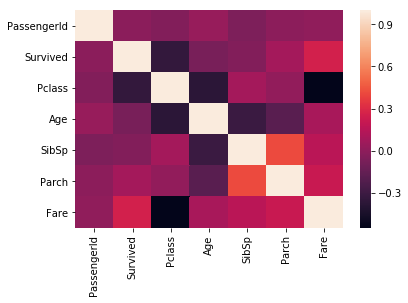

In [36]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

As we can see, the correlation heatmap of our features only 
select numbers. 

In [24]:
# pd.fillna(pd.median())

In [23]:
# df.Age.mean()

In [22]:
# sample = df.sample(n=50, random_state=22)
# sample.Age.mean() 

In [68]:
# sample_means = []
# for i in range(10**4):
#     sample = df.sample(n=50, random_state=i) #Take a sample of 50 people
#     sample_means.append(sample.Age.mean())#Calculate the sample mean

In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# # sns.set_style('darkgrid') #Pretty background including grid lines for our backdrop
# plt.hist(sample_means, bins=250);

In [66]:
# df['Age'].fillna((df['Age'].mean()), inplace=True)

## Step 2: Define X and Y

For your first foray into logistic regression, you are going to attempt to build a model that classifies whether an individual survived the Titanic shipwreck or not (yes it's a bit morbid). Follow the programming patterns described above to define X and y.

In [42]:
y, X = dmatrices('Survived ~ Pclass  + C(Sex) + Age + SibSp +  Fare + C(Embarked)',
                  df, return_type = "dataframe")
# X.isna().sum()
# df.isna().sum()
# len(X)
# len(df)
X.head()

,Intercept,C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Pclass,Age,SibSp,Fare
0,1.0,1.0,0.0,1.0,3.0,22.0,1.0,7.2500
1,1.0,0.0,0.0,0.0,1.0,38.0,1.0,71.2833
2,1.0,0.0,0.0,1.0,3.0,26.0,0.0,7.9250
3,1.0,0.0,0.0,1.0,1.0,35.0,1.0,53.1000
4,1.0,1.0,0.0,1.0,3.0,35.0,0.0,8.0500


It seems that the dmatricies has dropped my nan's and cleaned up my data making it all categorical. 

## Step 3: Fit the model

Now with everything in place, initialize a regression object and fit your model!

### Warning: If you receive an error of the form "LinAlgError: Singular matrix"

Stats models was unable to fit the model due to some Linear Algebra problems. Specifically, the matrix was not invertible due to not being full rank. In layman's terms, there was a lot of redundant, superfluous data. Try removing some features from the model and running it again.

In [39]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.444229
         Iterations 6


## Step 4: Analyzing results

Generate the summary table for your model. Then, comment on the p-values associated with the various features you chose.

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Fri, 14 Jun 2019   Pseudo R-squ.:                  0.3417
Time:                        19:59:32   Log-Likelihood:                -316.29
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.360e-67
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.6378      0.633      8.901      0.000       4.396       6.879
C(Sex)[T.male]      -2.6168      0.217    -12.040      0.000      -3.043      -2.191
C(Embarked)[T.Q]    -0.8155      0.598     -1.363      0.173      -1.988       0.357
C(Embarked)[T.S]    -0.4036      0.270     -1.494      0.135      -0.933       0.126
Pclass              -1.2102      0.163     -7.427      0.000      -1.530      -0.891
Age                 -0.0433      0.008     -5.263      0.000      -0.059      -0.027
SibSp               -0.3796      0.125     -3.043      0.002      -0.624      -0.135
Fare                 0.0012      0.002      0.474      0.635      -0.004       0.006
====================================================================================
"""

## Your analysis here

## Level - up

Create a new model, this time only using those features you determined were influential based on your analysis in step 4.

In [50]:
 df.drop(['Name', 'Embarked', 'Cabin', 'Fare'], axis=1, inplace=True)

In [51]:
y, X = dmatrices('Survived ~ Pclass  + C(Sex) + Age + SibSp',
                  df, return_type = "dataframe")

In [ ]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()

In [52]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Fri, 14 Jun 2019   Pseudo R-squ.:                  0.3417
Time:                        20:26:39   Log-Likelihood:                -316.29
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.360e-67
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.6378      0.633      8.901      0.000       4.396       6.879
C(Sex)[T.male]      -2.6168      0.217    -12.040      0.000      -3.043      -2.191
C(Embarked)[T.Q]    -0.8155      0.598     -1.363      0.173      -1.988       0.357
C(Embarked)[T.S]    -0.4036      0.270     -1.494      0.135      -0.933       0.126
Pclass              -1.2102      0.163     -7.427      0.000      -1.530      -0.891
Age                 -0.0433      0.008     -5.263      0.000      -0.059      -0.027
SibSp               -0.3796      0.125     -3.043      0.002      -0.624      -0.135
Fare                 0.0012      0.002      0.474      0.635      -0.004       0.006
====================================================================================
"""

## Summary 

Well done! In this lab, you practiced using stats models to build a logistic regression model. You then reviewed interpreting the results, building upon your previous stats knowledge, similar to linear regression. Continue on to take a look at building logistic regression models in Sci-kit learn!